In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import plotly.express as px
import matplotlib.ticker as ticker


# <span style="color:red"> * Read Data<span>

In [18]:
Data = pd.read_csv('stock_market_data.csv')
AMZN = Data[:3119]
FB = Data[3119:6238]
TSLA = Data[6238:9357]
GOOGL = Data[9357:12476]
AAPL = Data[12476:]
tlist = [AMZN, FB, TSLA, GOOGL, AAPL]
tickers = ['AMZN', 'FB', 'TSLA', 'GOOGL', 'AAPL']

In [3]:
### USER DATABASE ###
user_shares = {}


# <span style="color:red"> * Sign up<span>

<h3> Welcome to NYSE Stock market, please sign up to continue: </h3>

<h6> please enter your first name and last name: </h6>

In [4]:
name = input()

Mahdi Porheydari


<h6>please enter your ID number:</h6>

In [5]:
ID = input()

123


<h6>please enter you birth date in this format(dd/mm/yyyy):</h6>

In [6]:
BD = input()

12/12/200


<h6>please enter your balance in US$:</h6>

In [7]:
Balance = int(input())

2500


<h3>Thanks for your registration, now you have access to trade in Stock market</h3>


# <span style="color:red"> * Stock market portfolio<span>

## to buy shares:

In [9]:
print(f'Your Balance is : {Balance}')
pick = int(input('''to buy shares, please enter the ticker's number:
1- AMZN
2- FB
3- TSLA
4- GOOGL
5- AAPL
'''))
curr_price = list(tlist[pick-1]['Open'])[-1]
to_buy = int(input(f'{tickers[pick-1]} price is {curr_price} per share, how many shares do you want to buy?'))
if(to_buy * curr_price > Balance):
    print("Insufficient Balance")
else:
    Balance -= to_buy * curr_price
    if tickers[pick-1] in user_shares.keys():
        user_shares[tickers[pick-1]] += to_buy
    else:
        user_shares[tickers[pick-1]] = to_buy
    print(f'You have successfully buy {to_buy} shares of {tickers[pick-1]}, your new Balance is : {Balance}$')
        

Your Balance is : 2500
to buy shares, please enter the ticker's number:
1- AMZN
2- FB
3- TSLA
4- GOOGL
5- AAPL
3
TSLA price is 773.47998046875 per share, how many shares do you want to buy?2
You have successfully buy 2 shares of TSLA, your new Balance is : 953.0400390625$


## to sell shares:

In [ ]:
d = {'Shares': list(user_shares.keys()), 'Quantities': list(user_shares.values())}
df2 = pd.DataFrame(data=d)
df2 = df2.set_index('Quantities')
df2 = df2.drop(0)
df2 = df2.reset_index()
if len(df2):
    print(df2)
print(f'Your Shares are listed Below :')
pick = int(input('''to sell shares, please enter the ticker's number:
1- AMZN
2- FB
3- TSLA
4- GOOGL
5- AAPL
'''))
if tickers[pick-1] in user_shares.keys() and user_shares[tickers[pick-1]] != 0:   
    curr_price = list(tlist[pick-1]['Open'])[-1]
    to_sell = int(input(f'{tickers[pick-1]} price is {curr_price} per share and you have {user_shares[tickers[pick-1]]} shares, how many shares of yours do you want to sell?'))
    if(to_sell > int(user_shares[tickers[pick-1]])):
        print("Insufficient Shares!")
    else:
        user_shares[tickers[pick-1]] -= to_sell
        Balance += to_sell * curr_price
        print(f'You have successfully sell {to_sell} shares of {tickers[pick-1]}, your new Balance is : {Balance}')
else:
    print(f'You do not have any {tickers[pick-1]} shares in your portfolio!')
        

## to check charts:

to check the charts, please enter the ticker's number:
1- AMZN
2- FB
3- TSLA
4- GOOGL
5- AAPL
3


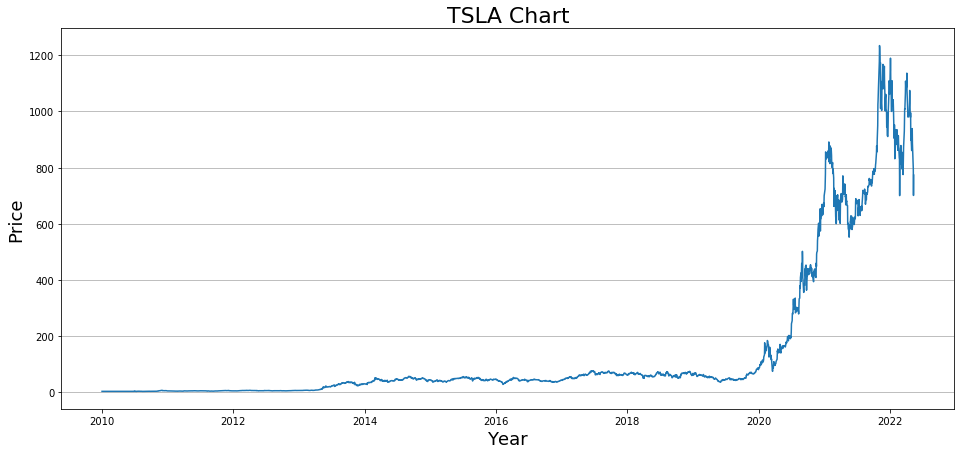

In [19]:
num = int(input('''to check the charts, please enter the ticker's number:
1- AMZN
2- FB
3- TSLA
4- GOOGL
5- AAPL
'''))
if num in range(1,6):
    xax = list(tlist[num-1]['Date'])
    yax = list(tlist[num-1]['Open'])
    xs = [datetime.strptime(x, "%Y-%m-%d") for x in xax]
    plt.figure(figsize=(16,7))
    plt.plot(xs, yax, label='chart',lw=1.5)
    plt.title(f'{tickers[num-1]} Chart', fontsize=22)
    plt.xlabel('Year', fontsize=18)
    plt.grid(axis='y')
    plt.ylabel('Price', fontsize=18)
    plt.show()
else:
    print("Wrong ticker number!")